Vicente De Leon

Deep Learning Principles: Homework 4

UID: 2001014594

# Dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Class Two2dGaussianData()

The following class generates a toy two 2D Gaussian dataset for binary classification purposes. This class will be use in order to implement the Logistic Regression task. HW4 talks about incorporating data processing, however I don't think it might be the case here. The class `Two2dGaussianData()` generates synthetic data that shows features with similar distributions. Just by looking at the `x0` and `x1` we can see how they are being generated using the "np.random.randn(N, 2) + np.array([0.9, 0.9])" and "np.random.randn(N, 2) + np.array([-0.9, -0.9])". This means similar two Gaussian distributions with different centers. So after generating the synthetic dataset, we will end up having data with similar scales. The decision boundary function will be implemented to help us see the separation between classes.

I remember creating the CNN model for cat vs dog image classification and performing data processing/feature engineering (HOG Feature Engineering) due to the different image scaling/features etc. Due to this toy dataset creation, I don't think any additional step regarding preprocessing is required here.

In [2]:
# class Two2dGaussianData() provided by assignment 4 to help us implement Logistic Regression

class Two2dGaussianData(object):
    '''
    Dataset of two 2d gaussian as a toy binary classification
    '''
    def __init__(self):
        '''
        initialize data with 2000 data points for training, 
        200 data points for validiation, 200 data points for test 
        '''
        N = 1200
        x0 = np.random.randn(N, 2) + np.array([0.9, 0.9])
        x1 = np.random.randn(N, 2) + np.array([-0.9, -0.9])
        self.X = {}
        self.X["train"]=np.vstack((x0[0:1000], x1[0:1000]))
        self.X["val"]=np.vstack((x0[1000:1100], x1[1000:1100]))
        self.X["test"]=np.vstack((x0[1100:1200], x1[1100:1200]))
        y0=np.zeros(N)#.astype(np.int)
        y1=np.ones(N)#.astype(np.int)
        self.y={}
        self.y["train"]=np.hstack((y0[0:1000], y1[0:1000]))
        self.y["val"]=np.hstack((y0[1000:1100], y1[1000:1100]))
        self.y["test"]=np.hstack((y0[1100:1200], y1[1100:1200]))
        
    def get_batch(self,batch_size,mode="train"):
        #get random batch
        num_all_data=len(self.X[mode])
        random_indices=np.random.choice(num_all_data, batch_size, replace=False)
        Xbatch=self.X[mode][random_indices]
        ybatch=self.y[mode][random_indices]

        return Xbatch,ybatch

# Logistic Regression Model

Even though I might be missing many important images from the Logistic Regression or the overall Regression Labs, these Applied Machine learning images were useful to refresh important concepts:

It is also important to state that the class Logistic Regression, the decision boundary function, and the accuracy function were taken from internet tutorials and StackoverFlow (see References). The YouTube tutorial within the source for the Logistic Regression class easily explained how to construct and implement the class Logistic Regression. Since we can't use train_test_split from sklearn, the data was manually split in order to fit model and predict accuracy.

- Sigmoid function:

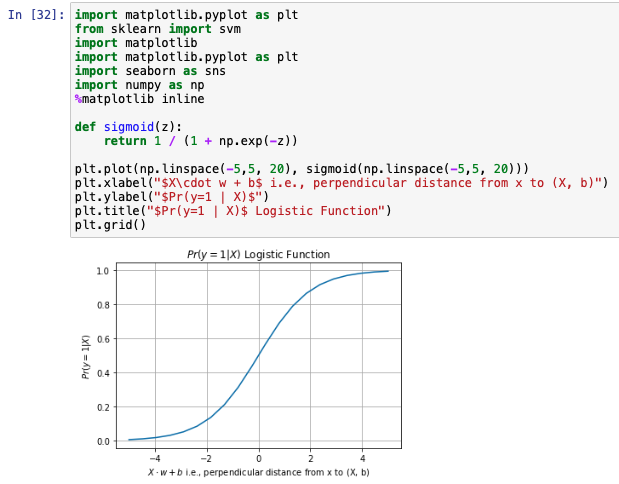


- np.round(y_pred):

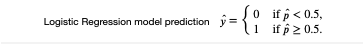

Prediction, Gradient, Weights, and Error:

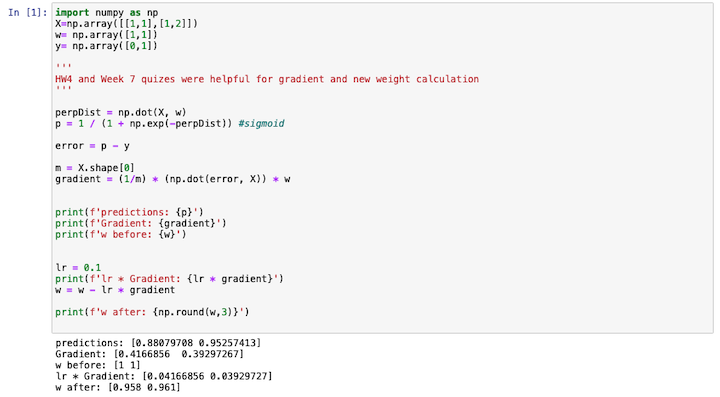


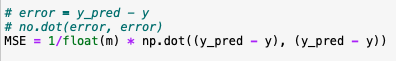

In [3]:
# Source: https://www.python-engineer.com/courses/mlfromscratch/03_logisticregression/
# No SKlearn, this is the logistic regression model from scratch using the above tutorial and some Applied Machine learning notes.

class LogisticRegression:

  def __init__(self, lr = 0.01, epochs = 1000): # usign basic 0.01 learning rate from APML and setting epochs to 1000
      self.lr = lr # storing the learning rate
      self.epochs = epochs # store epochs, using epochs name instead of n_iterator
      self.weights = None # setting weights to None
      self.bias = None # setting bias to None

  def sigmoid_function(self,z): # we can also view this function in the above sigmoid image
      return 1/(1 + np.exp(-z)) # sigmoid function
    
  def paramater(self, n_features):
      self.weights = np.zeros(n_features) # initialize paramater
      self.bias = 0 # initialize parameter

  def fit(self, X, y):
      m, n_features = X.shape # number of sample -> m and number of features -> n_features
      self.paramater(n_features)

      for _ in range(self.epochs): # for loop for the weight update
        linear_model = np.dot(X, self.weights) + self.bias # approx y with linear combination of weights and x, + bias
        y_pred = self.sigmoid_function(linear_model) # apply the sigmoid function

        # Gradient calculation
        # m = n_smaples APLM notation
        # error = y_pred - y APML notation
        # X Transpose
        error = y_pred - y
        dw = (1/m) * np.dot(X.T, error) # gradient of cost function in respect to the-> weights
        db = (1/m) * np.sum(error) # gradient of cost function in respect to the -> bias

        # Update parameters
        self.weights -= self.lr * dw
        self.bias -= self.lr * db

  def predict(self, X):
      linear_model = np.dot(X, self.weights) + self.bias
      y_pred = self.sigmoid_function(linear_model)
      y_pred_cls = np.round(y_pred) # the same as [1 if i > 0.5 else 0 for i in y_predicted]
      return y_pred_cls

In [4]:
# Source: https://hackernoon.com/how-to-plot-a-decision-boundary-for-machine-learning-algorithms-in-python-3o1n3w07
# This function was created to visualize classes separation using the above sources. This function can be reused.

def plot_decision_boundary(model, X, y):

    min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1 # bound of domain
    min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1 # bound of domain

    # Define the x and y scale
    x1grid = np.arange(min1, max1, 0.1)
    x2grid = np.arange(min2, max2, 0.1)

    
    xx, yy = np.meshgrid(x1grid, x2grid) # create all of the lines and rows of the grid

    # Flatten each grid to a vector
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

    
    grid = np.hstack((r1,r2)) # horizontal stack vectors to create x1,x2 input for the model

    
    yhat = model.predict(grid) # grid prediction

   
    zz = yhat.reshape(xx.shape) # reshape the predictions back into a grid

    
    plt.contourf(xx, yy, zz, cmap='Paired') # plot the grid of x, y and z values as a surface

    # Create scatter plot for samples from each class
    for class_value in range(2):
        row_ix = np.where(y == class_value) # get row indexes for samples with this class
        plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired') # create scatter of these samples

    plt.show()

In [5]:
# Source: https://stackoverflow.com/questions/64680195/calculate-the-accuracy-of-a-machine-learning-model-without-sklearn

def accuracy(y_true, y_pred):
  correct = np.sum(np.equal(y_true, y_pred)) # numpy version of y_true == y_pred
  total = len(y_true)
  return correct / total

In [6]:
toy_dataset = Two2dGaussianData() # 2D

# Manually splitting dataset
X_train = toy_dataset.X['train']
y_train = toy_dataset.y['train']

X_val = toy_dataset.X['val']
y_val = toy_dataset.y['val']

X_test = toy_dataset.X['test']
y_test = toy_dataset.y['test']

In [7]:
logistic_model = LogisticRegression(lr = 0.01, epochs = 1000) # LogisticRegression()

In [8]:
logistic_model.fit(X_train, y_train)

<ipython-input-4-a1755370aaa4>:34: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired') # Create scatter of these samples


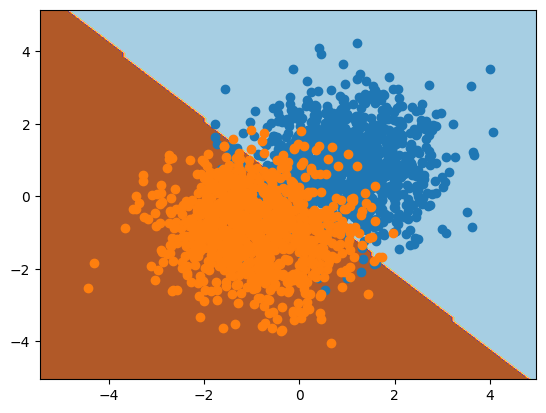

In [9]:
plot_decision_boundary(logistic_model, X_train, y_train) # apply decision boundary function

# Train, Validation, and Testing Accuracy

In [10]:
y_pred = logistic_model.predict(X_train)

train_acc = accuracy(y_train, y_pred)
print('Train accuracy for the Logistic Regression Model is:', train_acc)

Train accuracy for the Logistic Regression Model is: 0.8955


In [11]:
y_val_pred = logistic_model.predict(X_val)

val_acc = accuracy(y_val, y_val_pred)
print('Validation accuracy for the Logistic Regression Model is:', val_acc)

Validation accuracy for the Logistic Regression Model is: 0.895


In [12]:
y_test_pred = logistic_model.predict(X_test)

test_acc = accuracy(y_test, y_test_pred)
print('Test accuracy for the Logistic Regression Model is:', test_acc)

Test accuracy for the Logistic Regression Model is: 0.905


By looking at the results we can clearly see that the Logistic Regression model is working correctly. The model is not overfitting (train accuracy higher than the validation and test accuracy scores) nor underfitting (low scores for the three of them). Obviously, it will be ideal to use other methods like confusion matrix and classification report to try and understand more in depth how the model is working. Since this is a basic logistic regression for binary classification, only the accuracy score is implemented.  

# References:

- Class Logistic Regression: https://www.python-engineer.com/courses/mlfromscratch/03_logisticregression/

- Class Logistic Regression: https://www.geeksforgeeks.org/implementation-of-logistic-regression-from-scratch-using-python/

- Class Logistic Regression: https://www.analyticsvidhya.com/blog/2022/02/implementing-logistic-regression-from-scratch-using-python/

- Other Logistic Regression Model no SKlearn: https://pub.towardsai.net/linear-models-for-classification-logistic-regression-with-without-sklearn-library-6ec9a5556023

- Accuracy score: https://stackoverflow.com/questions/64680195/calculate-the-accuracy-of-a-machine-learning-model-without-sklearn

- Decision boundary plot: https://hackernoon.com/how-to-plot-a-decision-boundary-for-machine-learning-algorithms-in-python-3o1n3w07

